In [ ]:
!pip install colorama
!git clone https://github.com/puzzlelib/PuzzleLib
!cd PuzzleLib && python setup.py install --backend=cuda

# Costs

**Costs** (критерии обучения, ошибки, функции потерь) – это функции, вычисляющие ошибку сети.

Базовый интерфейс всех костов определяется классом Cost.

В данном модуле будет продемонстрирована работа различных функиций ошибок.
*   Abs
*   MSE
*   SmoothL1
*   CrossEntropy
*   BCE

**Импортирование на примере функции Abs:**


In [ ]:
import numpy as np
from PuzzleLib.Backend import gpuarray
from PuzzleLib.Cost import Abs

gpuarray необходим для правильного размещения тензора на GPU.

#Abs
**Abs** - функция потерь, вычисляющая среднюю абсолютную ошибку (mean absolute error - MAE), которая представляет из себя усреднённую сумму абсолютных разниц (то есть разниц по модулю) фактических и прогнозируемых значений.

Применяется в задачах *регрессии*, устойчива к выбросам.

**Формула функции ошибки:**

> $MAE = \frac{1}{N}\sum_{i=1}^N|y_i-	\hat{y_i}|$

где

$N$ - количество объектов в выборке;

$y_i$ - реальное значение для i-го объекта;

$	\hat{y_i}$ - предсказанное моделью значение для i-го объекта.

На приведенном ниже графике прогнозируемое значение представляет собой точку на линии, а фактическое значение показано маленьким кружком. 

Ошибка прогноза отображается как расстояние между точкой данных и подобранной линией. 

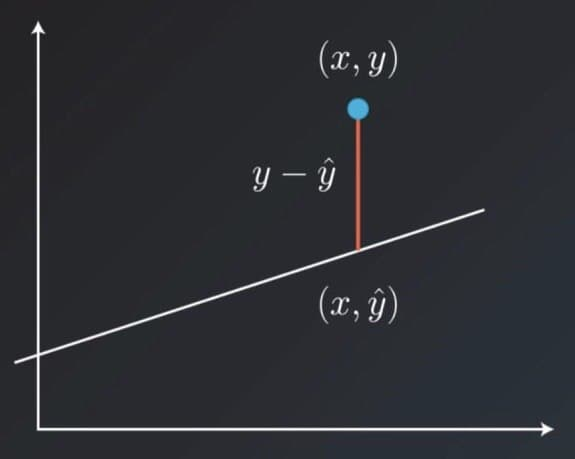

Подбор линии - задача регрессии, для которой применяетя и применяется MAE. MAE для линии рассчитывается как среднее значение суммы абсолютных разностей между фактическими и прогнозируемыми значениями. Для всех таких линий, возможных для данного набора данных, линия, которая дает минимальную или наименьшую MAE, считается наиболее подходящей.
 
Так как значение ошибки абсолютное, ошибка всегда является положительной.

График функций потерь MAE в зависимости от соотношения между прогнозируемыми и целевыми значениями. Потери наиболее близки к 0, когда прогнозируемое значение равно целевому.

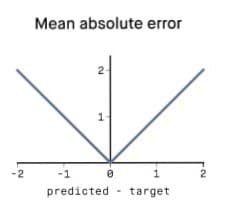

Предположим, у нас есть следующие массивы фактических и прогнозируемых значений в Python(target и predicted)

**Вычисление средней абсолютной ошибки:**

In [ ]:
#grad - градиент на батче
#error - MAE
import numpy as np
from PuzzleLib.Backend import gpuarray
from PuzzleLib.Cost import Abs
target = [12, 13, 14, 15, 15, 22, 27]
predicted = [11, 13, 14, 14, 15, 16, 18]
target = gpuarray.to_gpu(np.array(target).astype(np.float32))
predicted = gpuarray.to_gpu(np.array(predicted).astype(np.float32))
mae = Abs()
error, grad = mae(target, predicted)
print(error)

[PuzzleLib] Using device #0 (Tesla P4)
2.4285714285714284


Это говорит нам о том, что средняя разница между фактическим значением и значением, предсказанным моделью, составляет 2,42857.

Чем ниже MAE для данной модели, тем точнее модель может предсказать фактические значения.

**Примечание.** Массив фактических значений и массив прогнозируемых значений должны иметь одинаковую длину, чтобы эта функция работала правильно.



#MSE
**MSE** - функция потерь, вычисляющая среднеквадратичную ошибку (mean squared error - MSE), которая представляет из себя усреднённую сумму квадратов разниц фактических и прогнозируемых значений.

Применяется в задачах *регрессии*.

**Формула функции ошибки:**


> $MSE = \frac{1}{N}\sum_{i=1}^N(y_i-	\hat{y_i})^2$

где

$N$ - количество объектов в выборке;

$y_i$ - реальное значение для i-го объекта;

$	\hat{y_i}$ - предсказанное моделью значение для i-го объекта.

На приведенном ниже графике прогнозируемое значение представляет собой точку на линии, а фактическое значение показано маленьким кружком.

Ошибка прогноза отображается как расстояние между точкой данных и подобранной линией.

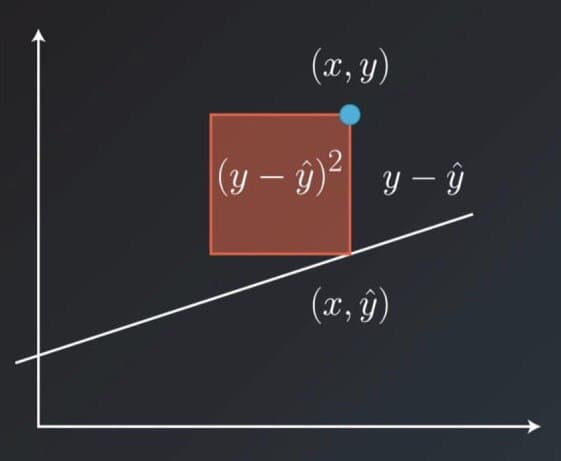

Подбор линии - задача регрессии, для которой применяетя и применяется MSE. MSE для линии рассчитывается как среднее значение суммы квадратов разностей между фактическими и прогнозируемыми значениями. Для всех таких линий, возможных для данного набора данных, линия, которая дает минимальную или наименьшую MSE, считается наиболее подходящей.

Так как значение ошибки - сумма квадратов, ошибка всегда является положительной.

График функций потерь MSE в зависимости от соотношения между прогнозируемыми и целевыми значениями. Потери наиболее близки к 0, когда прогнозируемое значение равно целевому.

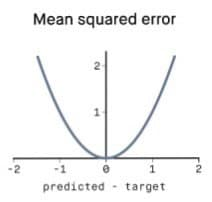

Предположим, у нас есть следующие массивы фактических и прогнозируемых значений в Python(target и prediction)

**Вычисление средней квадратичной ошибки:**


In [ ]:
#grad - градиент на батче
#error - MSE
import numpy as np
from PuzzleLib.Backend import gpuarray
from PuzzleLib.Cost import MSE
target = [12, 13, 14, 15, 15, 22, 27]
predicted = [11, 13, 14, 14, 15, 16, 18]
target = gpuarray.to_gpu(np.array(target).astype(np.float32))
predicted = gpuarray.to_gpu(np.array(predicted).astype(np.float32))
mse = MSE()
error, grad = mse(target, predicted)
print(error)

8.5


Среднеквадратичная ошибка (MSE) для этой модели оказывается  8.5.

**Примечание.** Массив фактических значений и массив прогнозируемых значений должны иметь одинаковую длину, чтобы эта функция работала правильно.

#MSE или MAE
Вопрос: MSE или MAE?

Порядок единиц MSE выше, чем единицы ошибки, поскольку ошибка возведена в квадрат. Чтобы получить тот же порядок единиц, многократно берется квадратный корень из MSE. Это называется среднеквадратичной ошибкой (RMSE).
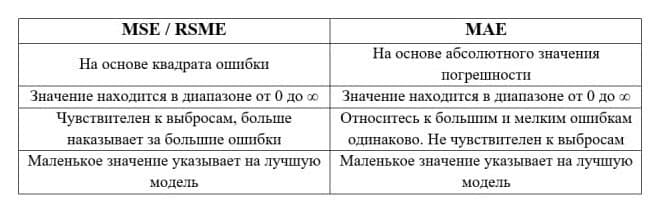

RSME всегда больше или равно MAE (RSME >= MAE). Большая разница между ними указывает на больший разброс индивидуальных ошибок в выборке.

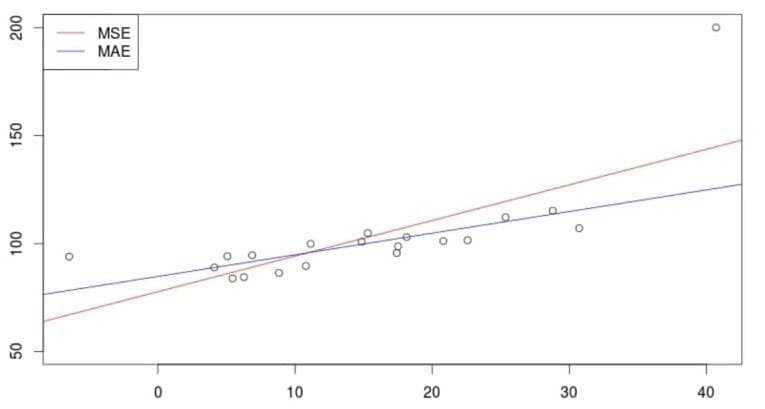

При x = 40, MSE задирается, что портит модель для остальных значений. MAE лояльна к этой точке.
При желании относиться ко всем ошибкам одинаково, лучше использовать MAE. Если мы хотим придать больший вес большим ошибкам, лучше использовать MSE или RMSE.

Но есть функция, которая является совокупностью MAE и MSE.



#SmoothL1

**SmoothL1** - функция потерь, которая является комбинацией MAE и MSE. Дифференцируема в точке ноль, что отсутствует в MAE, чувствительность к выбросам меньше, чем у MSE.

Применяется в задачах регрессии.

**Формула функции ошибки:**

$loss(x,y) = \frac{1}{N}\sum_{i=1}^Ns_i$

$s_i =
  \begin{cases}
    \frac{1}{2}(y-y^p)^2, & \quad \text{если }  |y-y^p| < 1\\
    |y-y^p| - \frac{1}{2}, & \quad \text{если } |y-y^p| \geq 1
  \end{cases}$

  где

$N$ - количество объектов в выборке;

$y$ - реальное значение объекта;

$y^p$ - предсказанное моделью значение для объекта.

**Вызов функции SmoothL1:**

In [ ]:
import numpy as np
from PuzzleLib.Backend import gpuarray
from PuzzleLib.Cost import SmoothL1
target = [12, 13, 14, 15, 15, 22, 27]
predicted = [11, 13, 14, 14, 15, 16, 18]
target = gpuarray.to_gpu(np.array(target).astype(np.float32))
predicted = gpuarray.to_gpu(np.array(predicted).astype(np.float32))
mse_mae = SmoothL1()
error, grad = mse_mae(target, predicted)
print(error)

2.142857142857143


SmooltL1 ведет себя как MAE, когда абсолютное значение аргумента велико, и как MSE, когда абсолютное значение аргумента близко к нулю.

**Примечание.** Массив фактических значений и массив прогнозируемых значений должны иметь одинаковую длину, чтобы эта функция работала правильно.

#CrossEntropy
**CrossEntropy** - функция потерь, вычисляющая перекрёстную энтропию (cross-entropy). Используется для количественной оценки разницы между двумя распределениями вероятностей. Одно из распределений - фактическое, другое - предсказанное.

Применяется в задачах *классификации*.

**Формула функции ошибки:**


> $H = -\sum_{с=1}^{M}y_{o,c}\cdot \log{p(y_{o,c})}$

где

M - количество классов;

$y_{o,c}$ - бинарный индикатор (0 или 1) принадлежности объекта $o$ классу
$с$;

$p(y_{o,c})$ - предсказанная классификатором вероятность принадлежности объекта $o$ классу $с$.

Мы считаем величину ошибки, т.е потерю. Если вероятность, связанная с классом $c$, равна 1,0, потеря должна быть равна нулю. Если эта вероятность мала, нужно, чтобы ее потери были ОГРОМНЫМИ!

Для этой цели нам подходит (отрицательный) логарифм вероятности(поскольку логарифм значений от 0,0 до 1,0 отрицателен, мы берем отрицательный логарифм, чтобы получить положительное значение потерь).
 
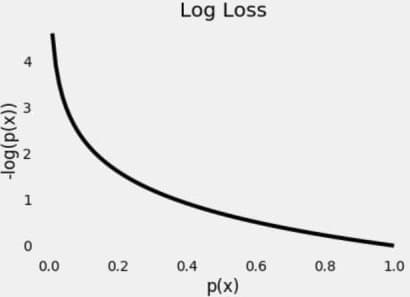

Если объект $o$ принадлежит классу $c$, то мы добавляем в сумму отрицательный log предсказанной классификатором вероятности принадлежности объекта $o$ классу $с$.

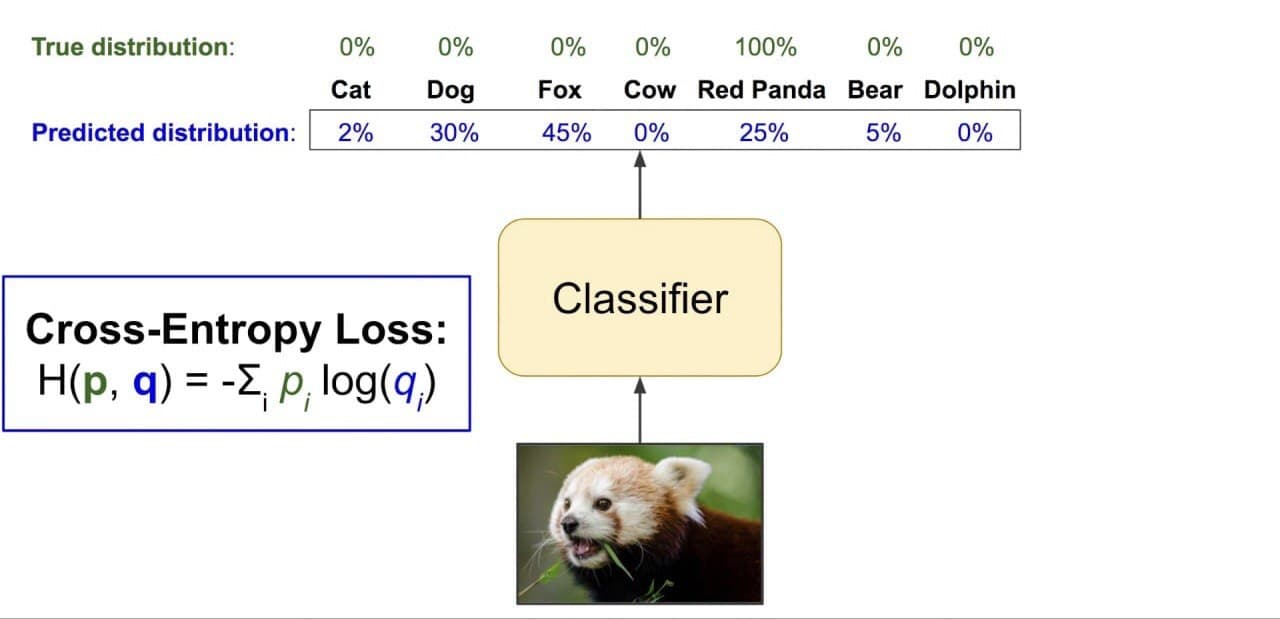
 


Массив, представляющий собой фактическое распределение: labels

Массив, представляющий собой распределение, значения которого предсказал классификатор: scores

**Вычисление потери CrossEntropy:**

In [ ]:
#grad - градиент на батче
#error - CrossEntropy loss
import numpy as np
from PuzzleLib.Backend import gpuarray
from PuzzleLib.Cost import CrossEntropy
scores = gpuarray.to_gpu((np.random.randn(20, 10, 3)).astype(np.float32))
labels = gpuarray.to_gpu(np.random.randint(low=0, high=10, size=(20, 3)).astype(np.int32))
ce = CrossEntropy()
error, grad = ce(scores, labels)
print(error)

2.7216968536376953


Кросс-энтропийная потеря используется при корректировке весов модели во время обучения. Цель состоит в том, чтобы минимизировать потери, то есть, чем меньше потери, тем лучше модель. У идеальной модели потеря кросс-энтропии равна 0.

**Примечание.** Функция потерь кросс-энтропии должна вычислять логарифм прогноза модели,  который сущетсвует, при условии, что прогнозы лежат между 0 и 1, поэтому:

> Сигмоид - единственная функция активации, совместимая с функцией потерь кроссэнтропии.



#BCE
**BCE** - функция потерь, вычисляющая бинарную перекрёстную энтропию (binary cross-entropy), которая является частным случаем кросс-энтропии (cross-entropy).

Применяется в задачах классификации с двумя классами.

**Формула функции ошибки:**



> $H = y\cdot \log{p(y)} + (1-y)\cdot \log(1-p(y))$

где

$y$ - бинарный индикатор (0 или 1) принадлежности к целевому классу;

$p(y)$ - предсказанная классификатором вероятность принадлежности к целевому классу.

Кросс-энтропия вычисляется на основе вероятностей, связанных с истинным классом, к которому объект либо принадлежит, либо нет. 

$y_i = 1 \Rightarrow log(p(y_i))$

$y_i = 0 \Rightarrow log(1 - p(y_i))$

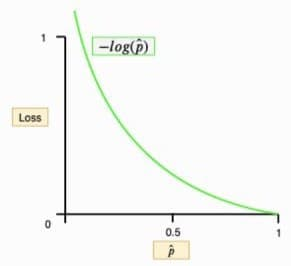
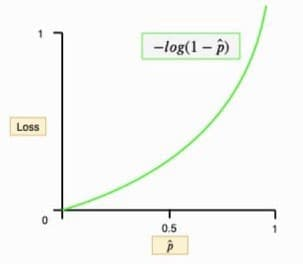

Мы считаем величину ошибки, т.е потерю. 



> $-log(p)$

Если вероятность, связанная с целевым классом равна 1,0, потеря должна быть равна нулю. Если эта вероятность мала, нужно, чтобы ее потери были ОГРОМНЫМИ!



> $-log(1 - p)$

Если вероятность, связанная с целевым классом равна 1,0, потеря должна быть ОГРОМНОЙ! Если эта вероятность мала, нужно, чтобы ее потери были минимальными, а вслучае, когда вероятность, связанная с целевым классом равна 0,0, потеря должна быть равна 0.

Для этой цели нам подходит (отрицательный) логарифм вероятности(поскольку логарифм значений от 0,0 до 1,0 отрицателен, мы берем отрицательный логарифм, чтобы получить положительное значение потерь).



**Вызов функции BCE:**


> Аналогично функции потерь CrossEntropy

Количество классов сужается до двух.



**Примечание.** Функция потерь бинарной кросс-энтропии должна вычислять логарифм прогноза модели,  который сущетсвует, при условии, что прогнозы лежат между 0 и 1, поэтому:

> Сигмоид - единственная функция активации, совместимая с функцией потерь бинарной кроссэнтропии.